**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [22]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [23]:
model = ExchangeEconomyClass()

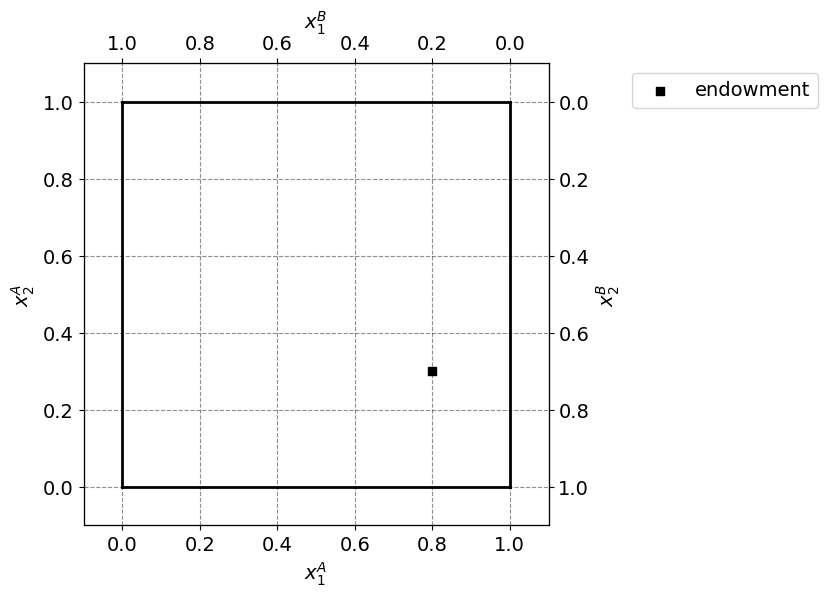

In [24]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Solving the Inaugural Project Questions: 

**Q1. Ilustrate in the Edgeworth box the Pareto Improvements:** 


**Solving Q1:** The first question requests finding graphically the Pareto Improvements, i.e. the combinations of goods x1A, x2A, x1B and x2B, that leave players A and B better or as well off as they were with their initial endowments (w1A, w2A, w1B and w2B). 

This implies that the utility for each agent at different allocations has to be calculated, and then compared to the utility they get from their initial endowments.

The first step was to add the mathematical expressions of the utility functions to the ExchangeEconomy.py file. 

In [25]:
# Creating a grid of possible allocations, using the required number of points and range:
N = 75
x1A_grid = np.linspace(0, 1, N)
x2A_grid = np.linspace(0, 1, N)

In [26]:
# Utility at the initial endowments 
utility_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
utility_B_endowment = model.utility_B(1-model.par.w1A, 1-model.par.w2A)

# Initialize list to store the pareto improvements  
pareto_imp_x1A = []
pareto_imp_x2A = []

# Looping to create the list of pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= utility_A_endowment and model.utility_B(x1B, x2B) >= utility_B_endowment:
            pareto_imp_x1A.append(x1A)
            pareto_imp_x2A.append(x2A)


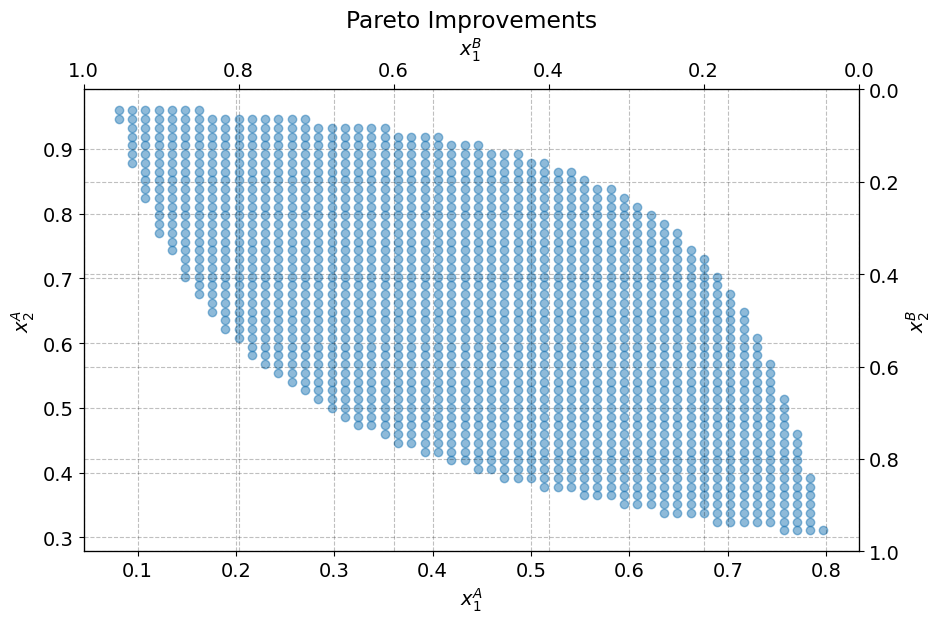

In [27]:

# Plotting the pareto improvements in the Edgeworth box
plt.figure(figsize=(10, 6))

    # Scatter plot for A's allocations
plt.scatter(pareto_imp_x1A, pareto_imp_x2A, alpha=0.5)

    # Setting labels for A's allocations
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')

    # Add second x-axis for B's allocations
ax_B1 = plt.twiny()
ax_B1.set_xlabel('$x_1^B$', color='black')
ax_B1.set_xlim([1, 0])  # Invert axis to match the perspective for B
ax_B1.tick_params(axis='x', colors='black')

    # Add second y-axis for B's allocations
ax_B2 = plt.twinx()
ax_B2.set_ylabel('$x_2^B$', color='black')
ax_B2.set_ylim([1, 0])  # Invert axis to match the perspective for B
ax_B2.tick_params(axis='y', colors='black')

plt.title('Pareto Improvements')
plt.show()

This graphic shows the combinations of x1A and x2A (and consequently, x1B and x2B) that are Pareto improvements relative to the initial endowments. This means, at these allocations, both players are at least as well off as they were initially.

**Q2. Calculate the error in the market clearing conditions:**


**Solving Q2:** In exchange economies, there is market clearing when total demand for each good is equal to total supply. When markets do not clear, we have market clearing errors. The market clearing error is the discrepancy between the total demand and supply for a good.

To answer this question, we  calculate the market clearing error across a range of prices for good 1 (p1), while keeping the price of good 2 (p2) fixed as the numeraire (i.e. p2=1).

The first step to answer this question was to define the demand functions in the ExchangeEconomy.py file. p2=1 was established as the default value. 

In [28]:
# Range of prices p1:
P1 = np.linspace(0.5, 2.5, 75)  # Creates 75 prices from 0.5 to 2.5

In [29]:
# Calculate the Market Clearing Errors:

    # Initialize empty list of errors
errors = []
    # Looping through each price, calculate the errors:
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    errors.append((eps1, eps2))


In [30]:
# Printing the (first 20) market clearing errors:
df_errors = pd.DataFrame(errors, columns=['ε1', 'ε2'])
df_errors['p1'] = P1  # Add p1 values as a column
df_errors = df_errors[['p1', 'ε1', 'ε2']]  # Reorder columns for readability
print(df_errors.head(20))

          p1        ε1        ε2
0   0.500000  0.533333 -0.266667
1   0.527027  0.475214 -0.250450
2   0.554054  0.422764 -0.234234
3   0.581081  0.375194 -0.218018
4   0.608108  0.331852 -0.201802
5   0.635135  0.292199 -0.185586
6   0.662162  0.255782 -0.169369
7   0.689189  0.222222 -0.153153
8   0.716216  0.191195 -0.136937
9   0.743243  0.162424 -0.120721
10  0.770270  0.135673 -0.104505
11  0.797297  0.110734 -0.088288
12  0.824324  0.087432 -0.072072
13  0.851351  0.065608 -0.055856
14  0.878378  0.045128 -0.039640
15  0.905405  0.025871 -0.023423
16  0.932432  0.007729 -0.007207
17  0.959459 -0.009390  0.009009
18  0.986486 -0.025571  0.025225
19  1.013514 -0.040889  0.041441


**Q3: Find the market clearing price:**

**Solving Q3:** The market clearing price is the one that sets the market clearing errors as close to zero as possible. 

To answer this question, we need to find the p1 that minimizes the total market clearing errors, i.e. the sum of the errors. 

In [31]:
# Defining total market clearing errors 
def total_market_clearing_error(p1):
    eps1, eps2 = model.check_market_clearing(p1)
    return abs(eps1) + abs(eps2)

# Minimizing total market clearing errors
from scipy.optimize import minimize_scalar

result = minimize_scalar(total_market_clearing_error)
optimal_p1 = result.x

# Printing the market-clearing price
print(f"The market-clearing price p1 is: {optimal_p1:.4f}")

The market-clearing price p1 is: 0.9444


/Users/snorriegholm/Documents/LínulegR/Þættir í þjóðhagfræði/projects-2024-isabel_nicole_snorri/inauguralproject/Documents from Lectures/ExchangeEconomy.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  x1A_star = par.alpha * I / p1
/Users/snorriegholm/Documents/LínulegR/Þættir í þjóðhagfræði/projects-2024-isabel_nicole_snorri/inauguralproject/Documents from Lectures/ExchangeEconomy.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  x1B_star = par.beta * I / p1


Q4: Assume that A chooses the price to maximize her own utility.
Find the allocation if only prices in P1 can be chosen.

In [34]:
# Define the utility function for A
def u_A(xA1, xA2):
    # Define the utility function for A (example function, replace with actual utility function)
    return xA1**0.5 * xA2**0.5

# Define the expressions for xB1 and xB2
def xB1(p1, omegaB1):
    return 1 - p1 - omegaB1

def xB2(p1, omegaB2):
    return 1 - p1 - omegaB2

# Define the set of prices P1
N = 75
P1 = np.linspace(0.5, 2.5, num=N+1)

# Initialize variables to store the optimal allocation and utility
optimal_allocation = None
max_utility = -np.inf

# Iterate over prices in P1
for p1 in P1:
    # Calculate the allocation for B given the price
    omegaB1 = 0.8  # assuming these are known values
    omegaB2 = 0.3  # assuming these are known values
    allocation_A = u_A(xB1(p1, omegaB1), xB2(p1, omegaB2))
    
    # Update optimal allocation and max utility if current utility is higher
    if allocation_A > max_utility:
        max_utility = allocation_A
        optimal_allocation = (xB1(p1, omegaB1), xB2(p1, omegaB2))

# Output the optimal allocation and max utility
print("Optimal Allocation for A:", optimal_allocation)
print("Max Utility for A:", max_utility)

Optimal Allocation for A: None
Max Utility for A: -inf


/var/folders/r8/pn5vck4x3zx9jxhz0vv_yb200000gn/T/ipykernel_35925/521867058.py:4: RuntimeWarning: invalid value encountered in scalar power
  return xA1**0.5 * xA2**0.5


In [35]:
from scipy.optimize import minimize

# Define the utility function for A
def u_A(xA1, xA2):
    # Define the utility function for A (example function, replace with actual utility function)
    return xA1**0.5 * xA2**0.5

# Define the expressions for xB1 and xB2
def xB1(p1, omegaB1):
    return 1 - p1 - omegaB1

def xB2(p1, omegaB2):
    return 1 - p1 - omegaB2

# Define the objective function to be minimized (negative of utility function)
def objective_function(p1, *args):
    omegaB1, omegaB2 = args
    return -u_A(1 - xB1(p1, omegaB1), 1 - xB2(p1, omegaB2))

# Initial guess for the price
initial_guess = 0.5  # you can choose any initial guess

# Bounds for the price (positive values only)
bounds = [(0, None)]  

# Additional arguments for the objective function (omegaB1, omegaB2)
args = (0.8, 0.3)  # assuming these are known values

# Minimize the objective function to find the optimal price
result = minimize(objective_function, initial_guess, args=args, bounds=bounds)

# Extract the optimal price
optimal_price = result.x[0]

# Calculate the optimal allocation for A
optimal_allocation_A = (1 - xB1(optimal_price, args[0]), 1 - xB2(optimal_price, args[1]))

# Output the optimal price and allocation for A
print("Optimal Price:", optimal_price)
print("Optimal Allocation for A:", optimal_allocation_A)

Optimal Price: 1.3492467832142396e+42
Optimal Allocation for A: (1.3492467832142396e+42, 1.3492467832142396e+42)
